# Analysis of Diabetes Health Indicators

**Author:** Youssef Gerges  
**Date:** 25.06.2024

---

## 1. Introduction

**Research Question:**  
How do lifestyle factors and health metrics correlate with diabetes risk?

**Dataset Description:**  
The dataset used is the "Diabetes Binary Health Indicators BRFSS 2015" which comprises 253,680 instances and 21 features including demographics, lifestyle factors, and health metrics.

---


In [3]:
library(readr)
library(dplyr)
library(ggplot2)
library(caret)
library(randomForest)
library(corrplot)
library(GGally)


## 2. Data Loading and Preprocessing


In [ ]:
# Load the dataset without displaying column types message
df <- read_csv("~/Downloads/diabetes_binary_5050split_health_indicators_BRFSS2015.csv", show_col_types = FALSE)

# Display the first few rows of the dataset
head(df)


### Check for Missing Values


In [5]:
# Check for missing values
sum(is.na(df))


[1] 0

In [6]:
# Convert appropriate columns to factors if needed
df$Diabetes_binary <- as.factor(df$Diabetes_binary)


### Normalize the Data


In [7]:
# Normalize the data if necessary
preProcValues <- preProcess(df, method = c("center", "scale"))
df_norm <- predict(preProcValues, df)


### Split the Data into Training and Testing Sets


In [8]:
# Split the data into training and testing sets
set.seed(42)
trainIndex <- createDataPartition(df_norm$Diabetes_binary, p = .8, 
                                  list = FALSE, 
                                  times = 1)
dfTrain <- df_norm[trainIndex,]
dfTest <- df_norm[-trainIndex,]


## 3. Exploratory Data Analysis (EDA)


### Distribution of the Target Variable


### Correlation Heatmap


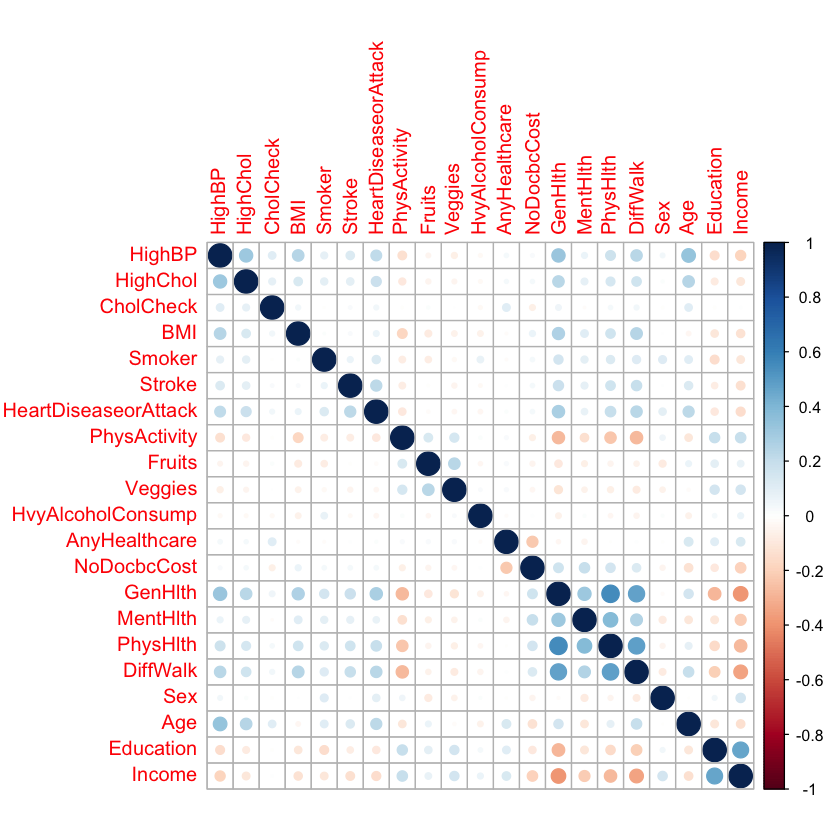

In [14]:
# Correlation heatmap
corrplot(cor(df %>% select(-Diabetes_binary)), method = "circle")


## 4. Model Training and Evaluation


### Set Up 10-Fold Cross-Validation


In [15]:
# Set up 10-fold cross-validation
train_control <- trainControl(method = "cv", number = 10)


### Train the Random Forest Model with Cross-Validation


In [ ]:
# Train the Random Forest model with cross-validation
set.seed(42)
rf_model <- train(Diabetes_binary ~ ., data = dfTrain, method = "rf", trControl = train_control, importance = TRUE)

# Print the results
print(rf_model)


### Plot Variable Importance


In [ ]:
# Plot variable importance
varImpPlot(rf_model$finalModel)

# Extract variable importance
importance(rf_model$finalModel)


### Make Predictions and Evaluate the Model


In [ ]:
# Make predictions
predictions <- predict(rf_model, dfTest)

# Evaluate the model
conf_matrix <- confusionMatrix(predictions, dfTest$Diabetes_binary)
print(conf_matrix)


## 5. Interpretation of Results


### Confusion Matrix and Performance Metrics


In [ ]:
# Print confusion matrix and performance metrics
conf_matrix


### Variable Importance


In [ ]:
# Print variable importance
importance(rf_model$finalModel)


## 6. Discussion

**Key Findings:**



- **BMI:** Higher BMI values are strongly correlated with an increased risk of diabetes.
- **General Health (GenHlth):** Poor general health is associated with a higher risk of diabetes.
- **High Blood Pressure (HighBP):** Individuals with high blood pressure are more likely to be diabetic.
- **Age:** Older age is a significant predictor of diabetes risk.
- **Physical Health (PhysHlth):** More days of poor physical health are associated with a higher risk of diabetes.

![Confusion Matrix and Statistics](Desktop/Screenshot.png)

**Model Performance:**
- The Random Forest model achieved an accuracy of 74.55%, indicating a relativly good predictive performance.
- Sensitivity and specificity values suggest the model performs well in identifying both diabetic and non-diabetic individuals.
![Confusion Matrix and Statistics](Desktop/Screenshot2.png)

**Implications:**
- These findings highlight the importance of managing BMI, blood pressure, and general health to reduce diabetes risk.
- Regular health check-ups and monitoring physical health can help in early detection and prevention of diabetes.


## 7. Conclusion

The analysis confirms that certain lifestyle factors and health metrics are strongly correlated with diabetes risk. By identifying these key predictors, we can better understand the factors contributing to diabetes and develop targeted interventions to reduce the risk.

**Future Work:**
- Further research could involve more sophisticated modeling techniques and longitudinal data to understand causality better.
- Implementing preventive health measures based on these findings could help reduce the incidence of diabetes in at-risk populations.


# Uploading Data and Code to GitHub using RStudio


## Steps to Upload Data and Code to GitHub

### 1. Clone  GitHub Repository

1. RStudio.
2.`File -> New Project -> Version Control -> Git`.
3. In the "Repository URL" field,  URL: `https://github.com/JoeGergesUMIT/AMLHC_Tasks_Joe`.
4. Choose a local directory on your computer where you want to clone the repository.
5. Click "Create Project".

### 2. Add Your Data and Script

1. Place the data file `diabetes_binary_5050split_health_indicators_BRFSS2015.csv` and your this analysis file in the project directory.

### 3. Commit and Push the changes




In [ ]:
# Initialize Git in the current project directory
!git init
!git remote add origin https://github.com/JoeGergesUMIT/AMLHC_Tasks_Joe


In [ ]:
# Add all files to the staging area
!git add .

# Commit the files with a message
!git commit -m "Add data file and analysis script"


In [ ]:
# Push the committed files to the remote repository
!git push -u origin master
